# Exploratory Data Analysis

Objetivo do projeto:

- Explorar o dataset Hotel Booking Demand com o Pandas e Seaborn, extraindo insights sobre cancelamentos.

## Data Acquisition

Vamos importar as bibliotecas necessárias para essa parte da análise:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Vamos carregar o dataset e olhar para as primeiras linhas com o método `head`:

In [3]:
df = pd.read_csv("hotel_bookings.csv")
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Substituímos os valores booleanos da coluna `is_canceled` por string, a fim de facilitar porteriormente a visualização e vamos dar uma olhada nas colunas do dataset:

In [4]:
# replace 1 and 0 (by 'canceled' and 'not canceled')
df['is_canceled'].replace({1: 'canceled', 0: 'not canceled'}, inplace = True)

# get data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

A explicação detalhada de cada coluna está disponível [neste](https://reader.elsevier.com/reader/sd/pii/S2352340918315191?token=83F1F9CEE62DA982747F9B04F0BEF4EE1FF074E1080DDB45264F7FDA03896F8B9F3E2638C293FD26C8E8811AD41CB090&originRegion=us-east-1&originCreation=20221005124056) link.

**Análises sobre o cancelamento:**



1.   O tipo de hotel (city hotels and resort hotels) influencia na taxa de cancelamento? 
2.   A antecedência que a reserva é feita influencia no cancelamento?
3.   Existe um cancelamento maior por região?
4.   É mais comum ocorrer cancelamento quando crianças são incluídas na reserva? 
5.   É mais comum ocorrer cancelamento quando a reserva contém mais pessoas?
6.   Existe cancelamento maior por período do ano (month)?
7.   Quem cancela uma vez, apresenta maior tendência a cancelar novamente?
8.   As mudanças na reserva influenciam no cancelamento?
9.   A forma de pagamento influencia no cancelamento?
10.  Há mais cancelamentos por companias específicas?
11.  Há mais cancelamentos por agências específicas? 
12.  Reserva com vaga para carro influencia no cancelamento? 
13.  A quantidade reservada de noites de estadia influencia no cancelamento?
14.  Mudanças no quarto reservado influenciam no cancelamento? 
15.  O segmento que fez a reserva influencia no cancelamento?

## Exploratory Data Analysis

Vamos verificar o percentual de cancelamento nesses dados:

Percentage cancelation:  0.37041628277075134


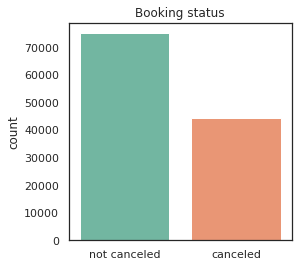

In [5]:
isCanceled = len(df[df['is_canceled']=='canceled'])
print("Percentage cancelation: ", isCanceled/len(df))

plt.rcParams['figure.figsize'] = [4, 4]
sns.set(style = 'white', font_scale = 1)

b_plot = sns.countplot(x=df['is_canceled'], data = df, palette = 'Set2')
b_plot = b_plot.set(title="Booking status",xlabel ="")

***1. O tipo de hotel (city hotels and resort hotels) influencia na taxa de cancelamento?***

Cancelations in resort hotel:  0.27763354967548676
Cancelations in city hotel:  0.41726963317786464


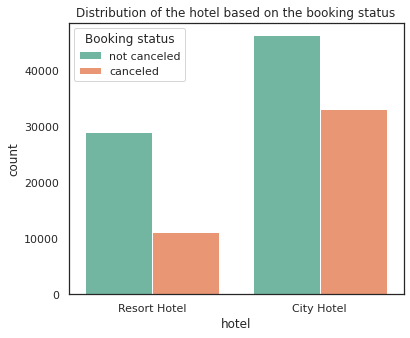

In [6]:
plt.rcParams['figure.figsize'] = [6, 5]

h_plot = sns.countplot(x=df['hotel'], hue = 'is_canceled', data = df, palette = 'Set2')
h_plot = h_plot.set_title("Distribution of the hotel based on the booking status")

# cancelations rate
resort_canceled = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']=='canceled')]
city_canceled = df[(df['hotel']=='City Hotel') & (df['is_canceled']=='canceled')]

rate_resort = (len(resort_canceled))/(len(df[df['hotel']=='Resort Hotel']))
rate_city   = (len(city_canceled))/(len(df[df['hotel']=='City Hotel']))

plt.legend(title='Booking status', loc='upper left')

print('Cancelations in resort hotel: ', rate_resort)
print('Cancelations in city hotel: ', rate_city)

***Nota:*** City hotels possuem uma taxa de cancelamento maior que resort hotels. 

***2. A antecedência que a reserva é feita influencia no cancelamento?***

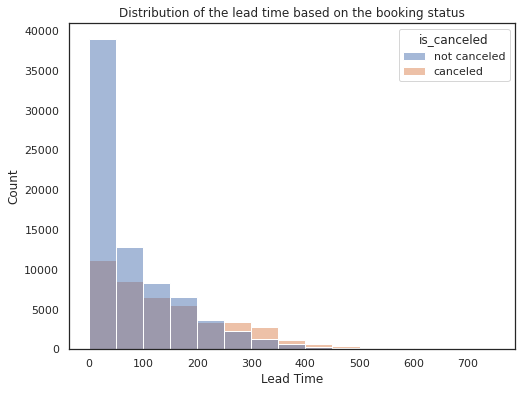

In [7]:
plt.rcParams['figure.figsize'] = [8, 6]

h_plot = sns.histplot(data=df, x="lead_time", hue="is_canceled", binwidth=50)

h_plot = h_plot.set(title="Distribution of the lead time based on the booking status",
                    xlabel="Lead Time")

***Nota:*** Quanto maior a antecedência da reserva, maior é a taxa de cancelamento em relação a não cancelamento.

***3. Existe um cancelamento maior por região?***

Primeiro vamos olhar para os países que mais fazem reserva. Definimos um limite de dados necessários para fazer algum tipo de inferência (acima de 1000 linhas no dataset):

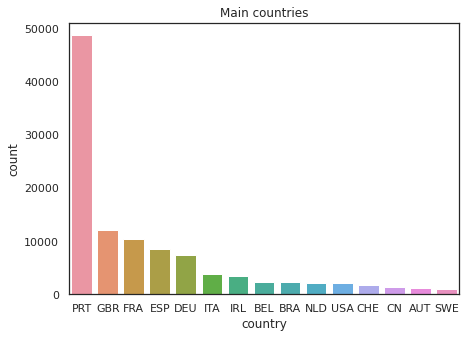

In [8]:
plt.rcParams['figure.figsize'] = [7, 5]

country = df["country"]

# count values of each unique value (country)
country_c = country.value_counts()

# filter countries with more than 1000 rows
country_c = country_c[country_c > 1000]

# bar plot
c_plot = sns.barplot(x=country_c.index, y=country_c)
c_plot = c_plot.set(title="Main countries",xlabel="country",ylabel="count")

Agora vamos ver esses principais países de origem em relação a taxa de cancelamento:

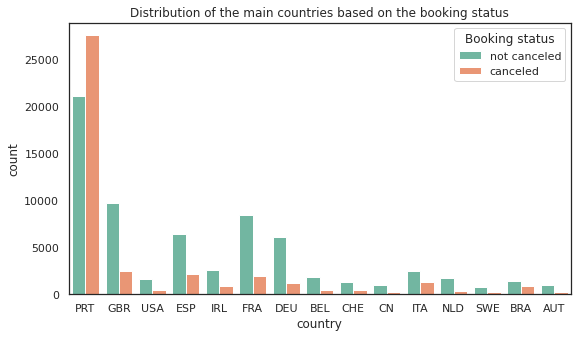

In [9]:
# filter countries with more than 1000 rows
countries = list(country_c.index)
df_filtered = df[df['country'].isin(countries)]

plt.rcParams['figure.figsize'] = [9, 5]
c_plot = sns.countplot(x=df_filtered['country'], hue = 'is_canceled', data = df_filtered, palette = 'Set2')
c_plot = c_plot.set_title("Distribution of the main countries based on the booking status")

plt.legend(title='Booking status', loc='upper right')

***Nota:*** Portugal possui uma taxa de cancelamento maior do que de não cancelamento, mas também é o país com a maior quantidade de reservas.

***4. É mais comum ocorrer cancelamento quando crianças são incluídas na reserva?***

Cancelations with children =  0.3492284612087441
Cancelations without children =  0.37221283323338605


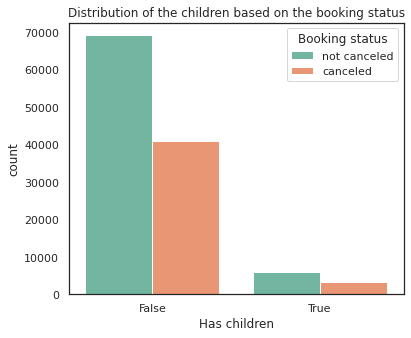

In [12]:
# add column indicating if there are children in the booking
df['has_children'] = df['children']+df['babies']
df['has_children'] = df['has_children'].apply(lambda x: 'True' if x >= 1 else 'False')

plt.rcParams['figure.figsize'] = [6, 5]

child_p = sns.countplot(x=df['has_children'], hue = 'is_canceled', data = df, palette = 'Set2')
child_p = child_p.set(title="Distribution of the children based on the booking status", xlabel="Has children")

plt.legend(title='Booking status', loc='upper right')

# cancelation rate 
child_canceled    = df[(df['has_children']=='True') & (df['is_canceled']=='canceled')]
notChild_canceled = df[(df['has_children']=='False') & (df['is_canceled']=='canceled')]

child_canceled    = (len(child_canceled))/(len(df[df['has_children']=='True']))
notChild_canceled = (len(notChild_canceled))/(len(df[df['has_children']=='False']))

print('Cancelations with children = ', child_canceled)
print('Cancelations without children = ', notChild_canceled)

***Nota:*** Não há diferença significativa no cancelamento de reservas com ou sem crianças.

***5. É mais comum ocorrer cancelamento quando a reserva contém mais pessoas?***

Vamos adicionar uma coluna com o total de pessoas na reserva: 

In [13]:
df['people_count'] = df['children']+df['adults']+df['babies']

people_count = df['people_count']
people_count.value_counts()

2.0     82048
1.0     22581
3.0     10494
4.0      3929
0.0       180
5.0       137
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: people_count, dtype: int64

Podemos observar que as quantidades significativas de dados estão concentradas nas reservas com 1 a 4 pessoas, então vamos analisar a taxa de cancelamento nesses grupos:

Cancelations with 1 person =  0.29028829546964263
Cancelations with 2 people =  0.3969505655226209
Cancelations with 3 people =  0.32170764246235944
Cancelations with 4 people =  0.4189361160600662


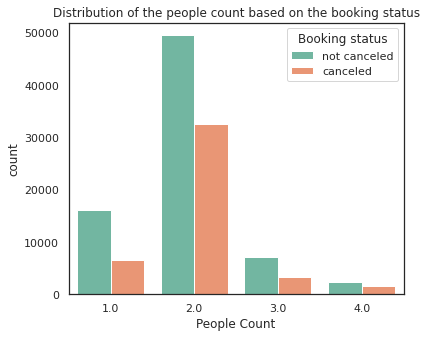

In [14]:
# filter by quantity greater than 1 and less than 4
df_filtered = df.query("people_count <= 4.0 and people_count >= 1.0")

people_p = sns.countplot(x=df_filtered['people_count'], hue = 'is_canceled', data = df_filtered, palette = 'Set2')
people_p = people_p.set(title="Distribution of the people count based on the booking status",xlabel="People Count")

plt.legend(title='Booking status', loc='upper right')


# cancelation rate
p1 = df[(df['people_count']==1.0) & (df['is_canceled']=='canceled')]
p2 = df[(df['people_count']==2.0) & (df['is_canceled']=='canceled')]
p3 = df[(df['people_count']==3.0) & (df['is_canceled']=='canceled')]
p4 = df[(df['people_count']==4.0) & (df['is_canceled']=='canceled')]

p1_can = (len(p1))/(len(df[df['people_count']==1.0]))
p2_can = (len(p2))/(len(df[df['people_count']==2.0]))
p3_can = (len(p3))/(len(df[df['people_count']==3.0]))
p4_can = (len(p4))/(len(df[df['people_count']==4.0]))

print('Cancelations with 1 person = ', p1_can)
print('Cancelations with 2 people = ', p2_can)
print('Cancelations with 3 people = ', p3_can)
print('Cancelations with 4 people = ', p4_can)


***Nota:*** Não há diferença significativa no cancelamento de acordo com a quantidade de pessoas na reserva.

***6. Existe cancelamento maior por período do ano (month)?***

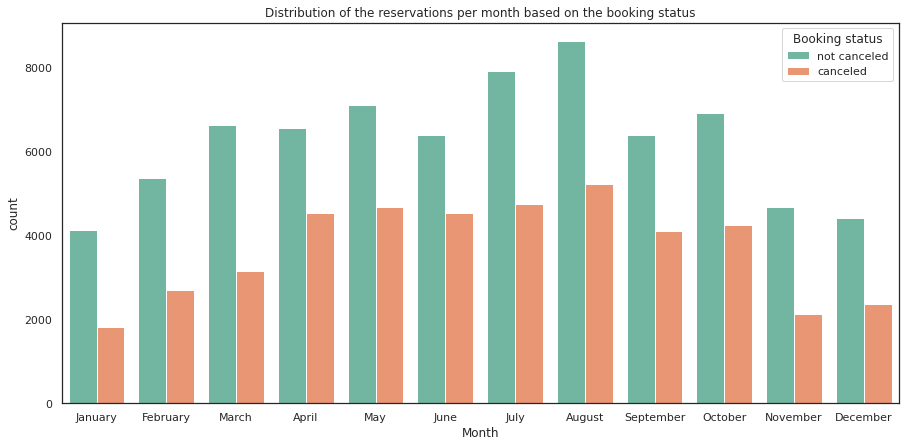

In [15]:
plt.rcParams['figure.figsize'] = [15, 7]

m_plot = sns.countplot(x=df['arrival_date_month'], hue = 'is_canceled', data = df, palette = 'Set2',
             order = ['January', 'February', 'March', 'April', 'May', 'June',
                      'July', 'August', 'September', 'October', 'November', 'December'])

m_plot = m_plot.set(title="Distribution of the reservations per month based on the booking status",
                    xlabel="Month")

plt.legend(title='Booking status', loc='upper right')

***Nota:*** A maior procura por reserva está concentrada nos meses de julho e agosto. Entre os meses de novembro e março há uma taxa de cancelamento maior do que nos outros meses.

***7. Quem cancela uma vez, apresenta maior tendência a cancelar novamente?***

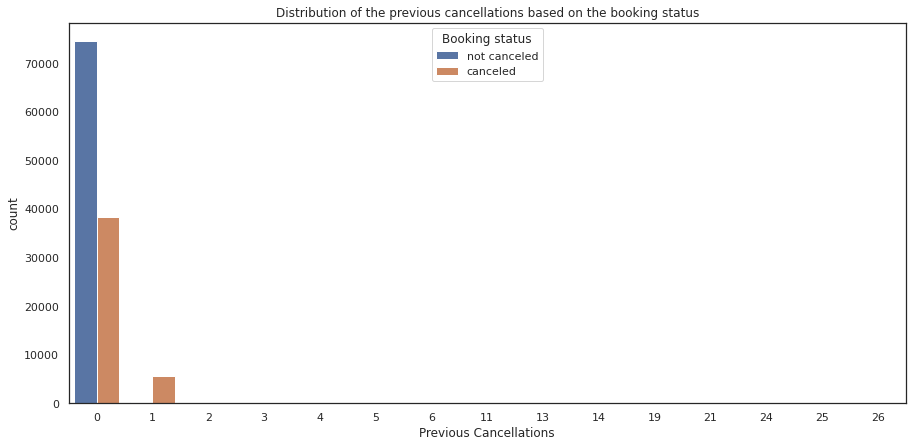

In [16]:
p_plot = sns.countplot(data=df, x='previous_cancellations', hue='is_canceled')

p_plot = p_plot.set(title="Distribution of the previous cancellations based on the booking status",
                    xlabel="Previous Cancellations")

plt.legend(title='Booking status', loc='upper center')

***Nota:*** A maioria dos viajantes não efetuou nenhum cancelamento anteriormente, mas dos que cancelaram uma vez, a taxa de cancelamento é mais alta do que de não cancelamento.

***8. As mudanças na reserva influenciam no cancelamento?***

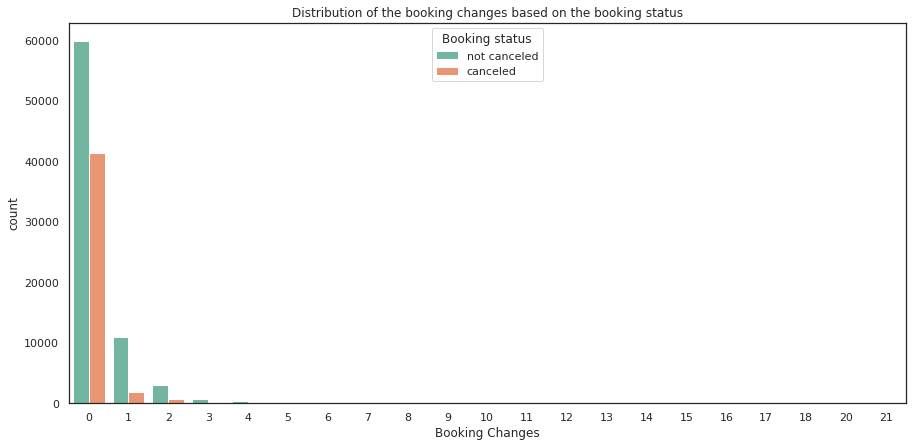

In [17]:
booking_p = sns.countplot(x=df['booking_changes'], hue = 'is_canceled', data = df, palette = 'Set2')

booking_p = booking_p.set(title="Distribution of the booking changes based on the booking status",
                          xlabel="Booking Changes")

plt.legend(title='Booking status', loc='upper center')

***Nota:*** Não há diferença significativa no cancelamento de acordo com a quantidade de mudanças na reserva.

***9. A forma de pagamento influencia no cancelamento?***

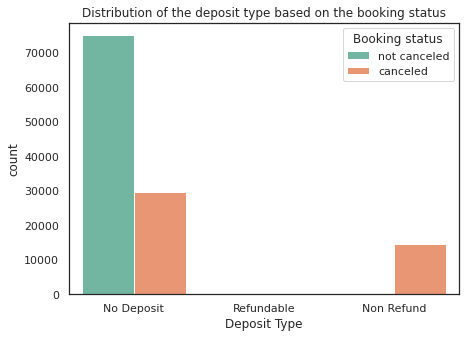

In [18]:
plt.rcParams['figure.figsize'] = [7, 5]

dep_p = sns.countplot(x=df['deposit_type'], hue = 'is_canceled', data = df, palette = 'Set2')

dep_p = dep_p.set(title = "Distribution of the deposit type based on the booking status",
                  xlabel="Deposit Type")

plt.legend(title='Booking status', loc='upper right')

***Nota:*** O depósito ser reembolsável ou não, não influencia na taxa de cancelamento. 

***10. Há mais cancelamentos por companias específicas?***

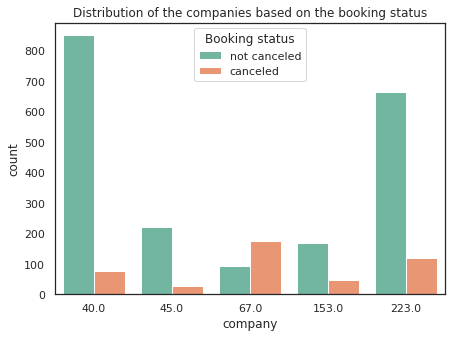

In [19]:
company = df["company"]

# count values of each unique value (company)
company_c = company.value_counts()

# filter by companies that have more than 200 rows 
# (reasonable amount to draw some conclusion)
company_c = company_c[company_c > 200]

companies = list(company_c.index)
df_filtered = df[df['company'].isin(companies)]

# barplot
c_plot = sns.countplot(x=df_filtered['company'], hue = 'is_canceled', data = df_filtered, palette = 'Set2')
c_plot.set(title = "Distribution of the companies based on the booking status")

plt.legend(title='Booking status', loc='upper center')

***Nota:*** Das empresas que possuem mais dados no dataset, uma delas possui a quantidade de cancelamentos maior do que de não cancelamentos.

***11. Há mais cancelamentos por agências específicas?***

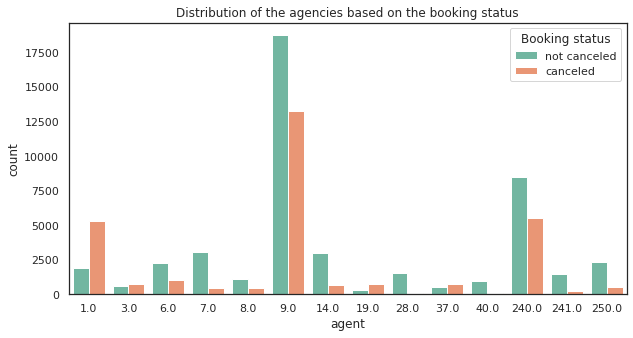

In [22]:
agent = df["agent"]

# count values of each unique value (company)
agent_c = agent.value_counts()

# filter by agencies that have more than 1000 rows 
# (reasonable amount to draw some conclusion)
agent_c = agent_c[agent_c > 1000]

agents = list(agent_c.index)
df_filtered = df[df['agent'].isin(agents)]

# batplot
plt.rcParams['figure.figsize'] = [10, 5]

a_plot = sns.countplot(x=df_filtered['agent'], hue = 'is_canceled', data = df_filtered, palette = 'Set2')
a_plot.set(title = "Distribution of the agencies based on the booking status")

plt.legend(title='Booking status', loc='upper right')

***Nota:*** Das agências que possuem mais dados no dataset, algumas delas possuem a quantidade de cancelamentos maior do que de não cancelamentos.

***12. Reserva com vaga para carro influencia no cancelamento?***

Vamos primeiro visualizar os valores únicos e respectivas quantidades desse atributo:

In [23]:
df['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

Como são poucos dados com mais de 2 reservas, vamos juntar esses dados em uma nova coluna `has_car`:

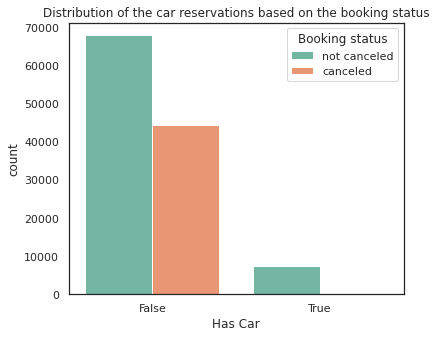

In [25]:
df['has_car'] = df['required_car_parking_spaces'].apply(lambda x: 'True' if x >= 1 else 'False')

plt.rcParams['figure.figsize'] = [6, 5]

dist = sns.countplot(x=df['has_car'], hue = 'is_canceled', data = df, palette = 'Set2')

dist.set(title = "Distribution of the car reservations based on the booking status",
         xlabel = "Has Car")

plt.legend(title='Booking status', loc='upper right')

***Nota:*** A quantidade de reservas com vaga para carro é menor do que sem vaga, mas das reservas com vaga para carro, nenhuma foi cancelada.

***13. A quantidade reservada de noites de estadia influencia no cancelamento?***

Vamos criar uma nova coluna com a quantidade total de dias e apresentar o resultado em um histograma: 

[Text(0.5, 0, 'Booking Days'),
 Text(0.5, 1.0, 'Distribution of the booking days based on the booking status')]

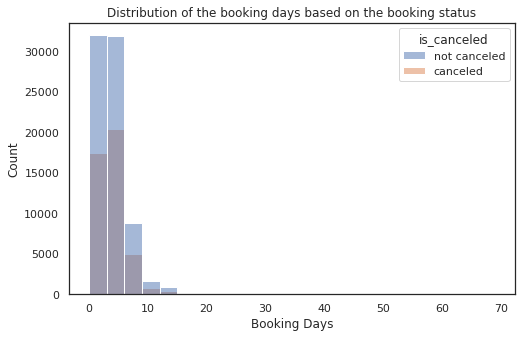

In [28]:
df['days_total'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

plt.rcParams['figure.figsize'] = [8, 5]

d_plot = sns.histplot(data=df, x="days_total", hue="is_canceled", binwidth=3)

d_plot.set(title = "Distribution of the booking days based on the booking status",
           xlabel = "Booking Days")


***Nota:*** Não há diferença significativa no cancelamento de acordo com a quantidade de dias da reserva.

***14. Mudanças no quarto reservado influenciam no cancelamento?***

Vamos criar uma nova coluna indicando se o quarto reservado foi o mesmo atribuído ao viajante:

In [29]:
def isSameRoom(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return 1
    else:
        return 0

df['same_room'] = df.apply(isSameRoom, axis=1)

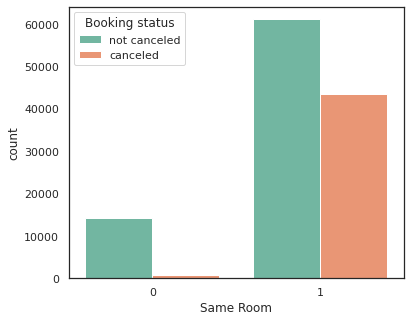

In [31]:
plt.rcParams['figure.figsize'] = [6, 5]

s_plot = sns.countplot(x=df['same_room'], hue = 'is_canceled', data = df, palette = 'Set2')

s_plot.set(xlabel = "Same Room")

plt.legend(title='Booking status', loc='upper left')

***Nota:*** Não há diferença significativa no cancelamento de acordo com mudanças do quarto reservado.

***15. O segmento que fez a reserva influencia no cancelamento?***

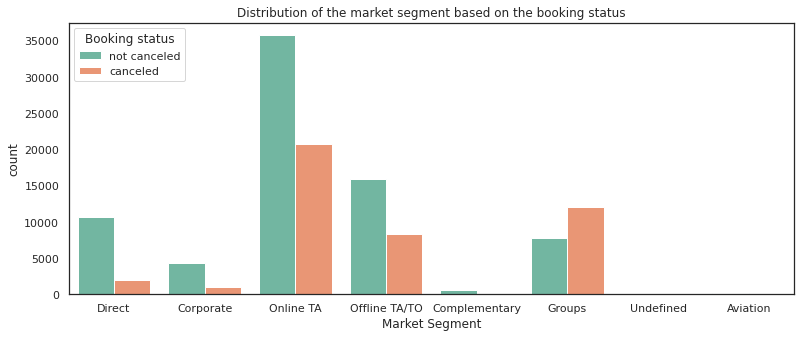

In [32]:
plt.rcParams['figure.figsize'] = [13, 5]

m_plot = sns.countplot(x=df['market_segment'], hue = 'is_canceled', data = df, palette = 'Set2')

m_plot.set(title = "Distribution of the market segment based on the booking status",
           xlabel = "Market Segment")

plt.legend(title='Booking status', loc='upper left')

***Nota:*** A quantidade de reservas realizadas por grupos têm mais cancelamentos do que não cancelamentos.